In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# importing graphing library for graphical analysis
    import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

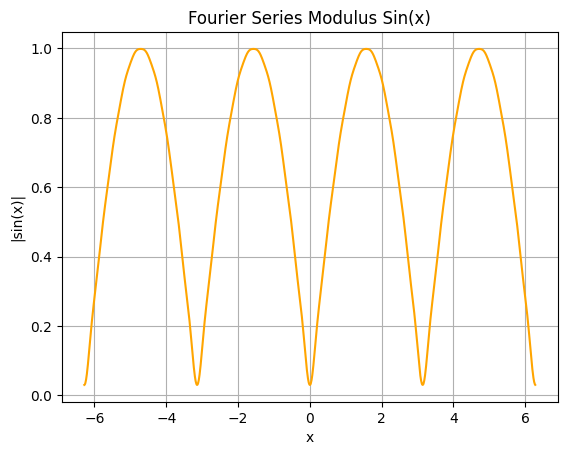

In [2]:
# Determing sin x via fourier series expansion
# Generating range of x values from - pi to pi to represent function
# optional scaling value for precision
# s = 1E-5
# x = np.arange(-np.pi, np.pi, s)

# gonna make a function of this part for convenience
def scale(start, end, s):
    x = np.arange(np.pi*start, np.pi*end , s)
    return x

x = scale(-2,2, 1E-2)

# n is the integer value based on the fourier series formula
# it may be plugged into function at desired value for precision purposes

def modsin(n, color):

    a = 0
    
    for i in range(1, n+1):
    #print(i) 
    #ensuring correct range of n integers throughout summation formula

        if i % 2 == 0: 
            # indicates number is even (if odd a = 0)
            a += np.cos(i*x) / (i**2 - 1)

    # generating sin(x) function based on formula for fourier series
    fsin = (2/np.pi) - (4/np.pi) * a

    # realizing this is graphing the modulus of sin(x)
    # modulus of sin(x) is the absolute value of the sin(x)
    # this makes sense based on the graph
    plt.plot(x, fsin, color)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("|sin(x)|")
    plt.title("Fourier Series Modulus Sin(x)")
    plt.show

    # returning absolute value of derived sin(x) based on fourier series
    # will play this to try and formulate a proper sin(x) function (non-absolute values)
    return fsin

absin = modsin(20, "orange")

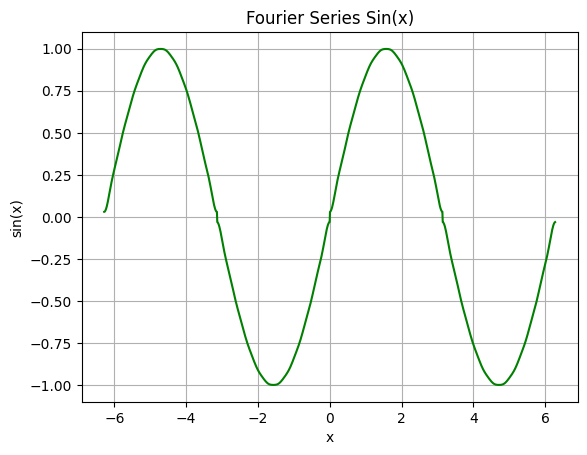

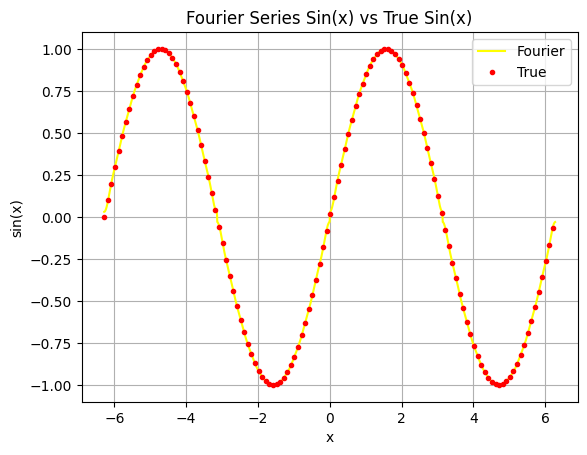

In [3]:
# for i in range(len(x)):

   # if -np.pi < x[i] < 0:
      #  absin[i] = -absin[i]

   # if np.pi < x[i] < 2*np.pi:
      #  absin[i] = -absin[i]

   # if 3*np.pi < x[i] < 4*np.pi:
      #  absin[i] = -absin[i]

tempmin = np.round(x[0]/np.pi).astype(int)
tempmax = np.round(np.max(x)/np.pi).astype(int)

# print (tempmin)
# print(tempmax)

fsin = absin

for j in range(tempmin, tempmax):
     if j % 2 != 0:
         for i in range(len(x)):
             if j*np.pi < x[i] < (j+1)*np.pi:
                 fsin[i] = -fsin[i]

# Plotting derived function for visual comparison with true sin function
def fourierplot(y, color, compare):
    plt.plot(x, fsin, color)
    plt.title("Fourier Series Sin(x)")
    if compare == True:
         # True sin(x) reference
        plt.plot(x[::10], np.sin(x)[::10], color="red", marker=".", linestyle='None')
        plt.title("Fourier Series Sin(x) vs True Sin(x)")
        plt.legend(["Fourier", "True"])
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    plt.grid()
    plt.show()

fourierplot(fsin, "green", False)
fourierplot(fsin, "yellow", True)

In [4]:
# Computing Error of fourier series

error = np.abs(fsin - np.sin(x))
print(error)

[0.03031523 0.02098151 0.01297119 ... 0.00854606 0.01572682 0.02421519]
